<h1><center> PPOL 5203 Data Science I: Foundations Project coding <br><br> 


In [5]:
import pandas as pd
import numpy as np

# 1. 读入数据
df = pd.read_csv("comments.csv")

# 看一下列名（确认有 text / published_at）
print(df.columns)

# 2. 处理时间：把 published_at 转成 datetime
# 你的格式像 "2023-09-10T11:36:08Z"，加 utc=True 直接变 UTC 时间
df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce", utc=True)

# 3. 丢掉时间或文本缺失的行（防止后面报错）
df = df.dropna(subset=["text", "published_at"]).reset_index(drop=True)

# 4. 新建“月份”变量，用来后面按月聚合
df["month"] = df["published_at"].dt.to_period("M")

df.head()


C:\Users\15655\AppData\Local\Temp\ipykernel_1840\1549122807.py:5: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("comments.csv")


Index(['rep.first_name', 'rep.last_name', 'rep.id_bioguide', 'rep_chamber',
       'rep_party', 'rep_state', 'term_start', 'term_end', 'channel_id',
       'social.youtube', 'youtube_url', 'video_id', 'comment_id', 'author',
       'text', 'published_at', 'is_reply', 'parent_id'],
      dtype='object')


C:\Users\15655\AppData\Local\Temp\ipykernel_1840\1549122807.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["published_at"].dt.to_period("M")


,rep.first_name,rep.last_name,rep.id_bioguide,rep_chamber,rep_party,rep_state,term_start,term_end,channel_id,social.youtube,youtube_url,video_id,comment_id,author,text,published_at,is_reply,parent_id,month
0,Aumua Amata,Radewagen,R000600,rep,Republican,AS,2025-01-03,2027-01-03,UCGdrLQbt1PYDTPsampx4t1A,NaN,https://www.youtube.com/channel/UCGdrLQbt1PYDT...,Zod1WBrDViU,UgxOq-IZP5npb09Wxv14AaABAg,@hasaneurope4603,❤❤💛💛🤍🤍,2023-09-10 11:35:58+00:00,FALSE,NaN,2023-09
1,Steve,Womack,W000809,rep,Republican,AR,2025-01-03,2027-01-03,UCXJbUDLYX-wGIhRuN66hqZw,CongressmanWomack,https://www.youtube.com/channel/UCXJbUDLYX-wGI...,BI4_jtPh67M,Ugwr0YkkCsMK9Z7ULHt4AaABAg,@eddoura,Mr.Kermit Womack was a GIANT towering figure. ...,2024-10-11 23:14:24+00:00,FALSE,NaN,2024-10
2,Steve,Womack,W000809,rep,Republican,AR,2025-01-03,2027-01-03,UCXJbUDLYX-wGIhRuN66hqZw,CongressmanWomack,https://www.youtube.com/channel/UCXJbUDLYX-wGI...,BI4_jtPh67M,UgxLfWhhiGd1VpF_V9N4AaABAg,@Bluefrog247,I will greatly miss listening to your father e...,2024-07-03 01:58:59+00:00,FALSE,NaN,2024-07
3,Steve,Womack,W000809,rep,Republican,AR,2025-01-03,2027-01-03,UCXJbUDLYX-wGIhRuN66hqZw,CongressmanWomack,https://www.youtube.com/channel/UCXJbUDLYX-wGI...,BI4_jtPh67M,UgzToKNUidyAtuhTJKJ4AaABAg,@djaztec9075,Today was a sad day in broadcasting. I'm grate...,2024-07-01 22:51:10+00:00,FALSE,NaN,2024-07
4,Steve,Womack,W000809,rep,Republican,AR,2025-01-03,2027-01-03,UCXJbUDLYX-wGIhRuN66hqZw,CongressmanWomack,https://www.youtube.com/channel/UCXJbUDLYX-wGI...,BI4_jtPh67M,UgzghG_GmM8M2rfQFRt4AaABAg,@tomoneal3835,"Thank you, Congressman. Your dad will be missed 😢",2024-06-26 02:43:02+00:00,FALSE,NaN,2024-06


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# 第一次需要下载资源
# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    """
    输入：原始字符串
    输出：预处理后的 token 列表（已经小写、去掉标点/停用词、做了 stemming）
    """
    # 保证是字符串
    text = str(text)
    
    # 1. 分词
    tokens = word_tokenize(text)
    
    # 2. 全部小写 + 只保留纯字母（去掉数字/emoji/标点/URL）
    tokens = [w.lower() for w in tokens if w.isalpha()]
    
    # 3. 去停用词
    tokens = [w for w in tokens if w not in stop_words]
    
    # 4. 词干化
    tokens = [porter.stem(w) for w in tokens]
    
    return tokens

# 在整列 text 上应用
df["tokens"] = df["text"].apply(preprocess_text)

# 可以看几条
df[["text", "tokens"]].head()


,text,tokens
0,❤❤💛💛🤍🤍,[]
1,Mr.Kermit Womack was a GIANT towering figure. ...,"[womack, giant, tower, figur, start, listen, s..."
2,I will greatly miss listening to your father e...,"[greatli, miss, listen, father, everi, day]"
3,Today was a sad day in broadcasting. I'm grate...,"[today, sad, day, broadcast, grate, colonel, u..."
4,"Thank you, Congressman. Your dad will be missed 😢","[thank, congressman, dad, miss]"


In [7]:
from gensim.corpora import Dictionary

# 1. 提取 token 列为 list of list
tokens_list = df["tokens"].tolist()

# 2. 可选：训练时只用“信息量稍微多一点”的评论
#    如果你想丢掉极短评论，可以打开下面两行：
# tokens_list = [t for t in tokens_list if len(t) >= 3]
# df = df[df["tokens"].apply(lambda x: len(x) >= 3)].reset_index(drop=True)

# 3. 构建字典（词-ID 映射）
dictionary = Dictionary(tokens_list)

# 4. 过滤极少见/极常见的词（自己可以调参数）
#    no_below=50：至少出现在 50 条评论里
#    no_above=0.5：最多出现在 50% 的评论里
dictionary.filter_extremes(no_below=50, no_above=0.5)

print("词表大小：", len(dictionary))

# 5. 把每条评论转换成 BOW（list of (token_id, count)）
corpus = [dictionary.doc2bow(doc) for doc in tokens_list]


词表大小： 7272


In [8]:
from gensim.models.ldamulticore import LdaMulticore

# 你可以根据需要调整 topic 数量
num_topics = 20

lda_model = LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    workers=4,        # 机器有几个 CPU 核就填几个或少一点
    chunksize=2000,
    passes=5,
    random_state=42
)

# 看每个 topic 的前 10 个关键词 —— 这一段要你肉眼看一下
for i, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {i}: {topic}\n")


Topic 0: 0.045*"year" + 0.034*"border" + 0.017*"problem" + 0.015*"drug" + 0.014*"illeg" + 0.014*"open" + 0.013*"close" + 0.012*"last" + 0.012*"ago" + 0.010*"immigr"

Topic 1: 0.022*"peopl" + 0.019*"children" + 0.016*"live" + 0.015*"life" + 0.014*"human" + 0.009*"women" + 0.009*"kill" + 0.008*"one" + 0.007*"care" + 0.007*"die"

Topic 2: 0.129*"thank" + 0.111*"biden" + 0.048*"well" + 0.036*"truth" + 0.035*"administr" + 0.032*"joe" + 0.032*"atf" + 0.026*"speak" + 0.024*"done" + 0.023*"congressman"

Topic 3: 0.054*"money" + 0.029*"pay" + 0.024*"tax" + 0.018*"peopl" + 0.017*"give" + 0.017*"fund" + 0.014*"american" + 0.014*"dollar" + 0.014*"govern" + 0.013*"get"

Topic 4: 0.073*"love" + 0.055*"great" + 0.049*"good" + 0.043*"thank" + 0.037*"job" + 0.032*"johnson" + 0.031*"keep" + 0.027*"speaker" + 0.024*"mike" + 0.023*"work"

Topic 5: 0.040*"peopl" + 0.036*"think" + 0.030*"make" + 0.024*"guy" + 0.023*"thing" + 0.021*"know" + 0.019*"stupid" + 0.018*"realli" + 0.017*"like" + 0.017*"right"

Topi

In [9]:
for i in range(13, 18):
    print(f"Topic {i}: {lda_model.print_topic(i, topn=10)}\n")


Topic 13: 0.026*"work" + 0.023*"road" + 0.022*"get" + 0.021*"got" + 0.020*"gun" + 0.018*"school" + 0.018*"block" + 0.016*"go" + 0.015*"need" + 0.014*"home"

Topic 14: 0.109*"god" + 0.053*"ye" + 0.049*"bless" + 0.028*"evil" + 0.017*"jesu" + 0.016*"name" + 0.015*"amen" + 0.014*"pray" + 0.014*"love" + 0.014*"may"

Topic 15: 0.025*"power" + 0.019*"energi" + 0.017*"electr" + 0.015*"wyom" + 0.014*"oil" + 0.014*"use" + 0.012*"ga" + 0.012*"chang" + 0.012*"climat" + 0.010*"need"

Topic 16: 0.024*"video" + 0.022*"watch" + 0.018*"comment" + 0.018*"time" + 0.015*"na" + 0.011*"read" + 0.011*"gon" + 0.010*"show" + 0.009*"get" + 0.009*"inform"

Topic 17: 0.064*"america" + 0.051*"right" + 0.045*"american" + 0.045*"state" + 0.043*"countri" + 0.039*"govern" + 0.037*"peopl" + 0.017*"unit" + 0.017*"citizen" + 0.016*"protect"



In [10]:
def get_main_topic(topic_probs):
    if not topic_probs:
        return None, 0.0
    return max(topic_probs, key=lambda x: x[1])

immigration_topic_id = 0  # TODO：用你真正选中的 ID 替换

main_topic_ids = []
main_topic_probs = []
immigration_probs = []

for bow in corpus:
    # minimum_probability=0.0 可以让所有 topic 都有一个显式概率
    topic_probs = lda_model.get_document_topics(bow, minimum_probability=0.0)
    
    # 1. 主 topic
    mt_id, mt_prob = get_main_topic(topic_probs)
    main_topic_ids.append(mt_id)
    main_topic_probs.append(mt_prob)
    
    # 2. 移民 topic 的概率
    topic_dict = dict(topic_probs)
    immigration_probs.append(topic_dict.get(immigration_topic_id, 0.0))

# 加到原 DataFrame 里
df["main_topic"] = main_topic_ids
df["main_topic_prob"] = main_topic_probs
df["topic_immigration_prob"] = immigration_probs

df[["text", "main_topic", "main_topic_prob", "topic_immigration_prob"]].head()

,text,main_topic,main_topic_prob,topic_immigration_prob
0,❤❤💛💛🤍🤍,0,0.050000,0.050000
1,Mr.Kermit Womack was a GIANT towering figure. ...,18,0.416232,0.003577
2,I will greatly miss listening to your father e...,14,0.329661,0.007145
3,Today was a sad day in broadcasting. I'm grate...,16,0.234742,0.003339
4,"Thank you, Congressman. Your dad will be missed 😢",2,0.809969,0.010002


In [11]:
# 1. 主 topic 是否为移民
df["is_immigration_main"] = (df["main_topic"] == immigration_topic_id).astype(int)

# 2. 按月聚合
monthly_topic = (
    df.groupby("month")
      .agg(
          n_comments=("text", "size"),
          immigration_main_share=("is_immigration_main", "mean"),   # 主 topic 为移民的比例
          immigration_prob_mean=("topic_immigration_prob", "mean")  # 移民 topic 概率的平均值
      )
      .reset_index()
)

# 把 period 转回时间戳（每月第一天），方便画图
monthly_topic["month"] = monthly_topic["month"].dt.to_timestamp()

monthly_topic.head()


,month,n_comments,immigration_main_share,immigration_prob_mean
0,2021-01-01,11647,0.049970,0.035976
1,2021-02-01,6006,0.057110,0.039255
2,2021-03-01,3410,0.073607,0.052582
3,2021-04-01,2696,0.094214,0.065705
4,2021-05-01,4283,0.075881,0.055180


In [12]:
monthly_topic.to_csv("monthly_immigration_topic.csv", index=False)


In [13]:
topic_dist = (
    df["main_topic"]
      .value_counts(normalize=True)   # 变成比例
      .rename_axis("topic_id")
      .reset_index(name="share")
)

topic_dist


,topic_id,share
0,18,0.108505
1,4,0.076337
2,5,0.074013
3,0,0.065598
4,19,0.060147
5,3,0.056410
6,1,0.050329
7,8,0.050285
8,11,0.045052
9,17,0.044930


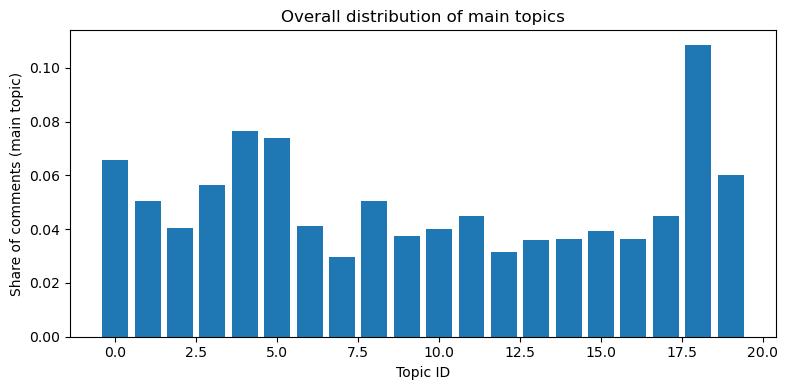

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(topic_dist["topic_id"], topic_dist["share"])
plt.xlabel("Topic ID")
plt.ylabel("Share of comments (main topic)")
plt.title("Overall distribution of main topics")
plt.tight_layout()
plt.show()


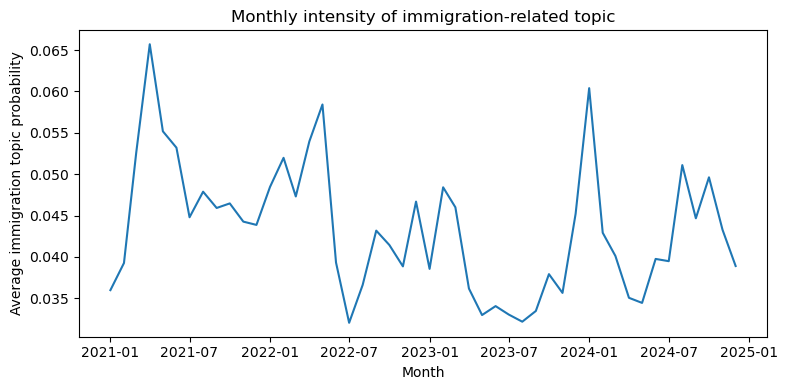

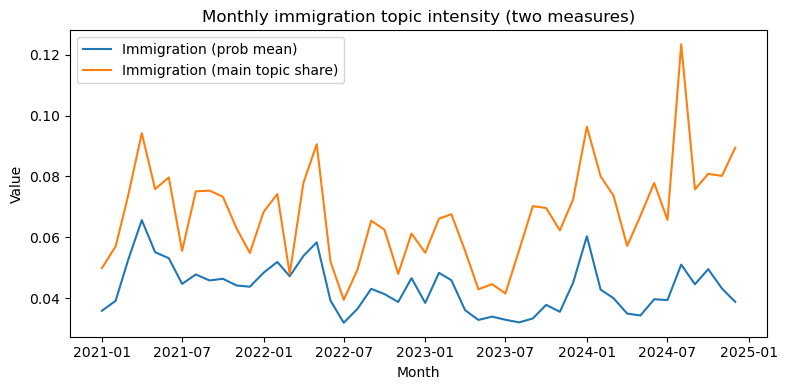

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_topic["month"], monthly_topic["immigration_prob_mean"])
plt.xlabel("Month")
plt.ylabel("Average immigration topic probability")
plt.title("Monthly intensity of immigration-related topic")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(monthly_topic["month"], monthly_topic["immigration_prob_mean"], label="Immigration (prob mean)")
plt.plot(monthly_topic["month"], monthly_topic["immigration_main_share"], label="Immigration (main topic share)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Monthly immigration topic intensity (two measures)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 先按 (month, main_topic) 统计数量

monthly_topic_all = (
    df.groupby(["month", "main_topic"])
      .size()
      .reset_index(name="n")
)

# 在每个月内部转成占比
monthly_topic_all["share"] = (
    monthly_topic_all.groupby("month")["n"]
                     .transform(lambda x: x / x.sum())
)

# 透视成矩阵形式：行 = 月份，列 = topic id，值 = share
topic_share_wide = (
    monthly_topic_all.pivot(index="month", columns="main_topic", values="share")
                     .fillna(0.0)
)

# 按时间排序（稳一点）
topic_share_wide = topic_share_wide.sort_index()



# 先按整体 share 找出最大的几个 topic
overall_topic_share = df["main_topic"].value_counts(normalize=True)

top_k = 4
top_topics = list(overall_topic_share.head(top_k).index)

# 确保把移民 topic 也加进去
immigration_topic_id = 0
if immigration_topic_id not in top_topics:
    top_topics.append(immigration_topic_id)

top_topics



[18, 4, 5, 0]

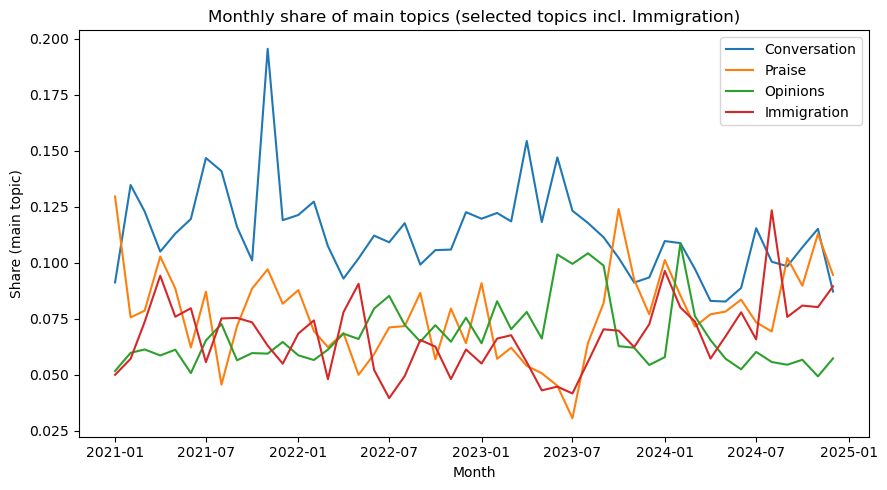

In [22]:


topic_labels = [
    "Immigration",   # Topic 0: border, illegal, drugs, immigration over the years
    "Humanity",      # Topic 1: people, children, life, killing, care, human lives
    "Biden",         # Topic 2: Biden, administration, ATF, congressman, thanking
    "Taxation",      # Topic 3: money, taxes, funding, government spending
    "Praise",        # Topic 4: love, great job, good work, Speaker Johnson
    "Opinions",      # Topic 5: people’s thoughts, stupid, guys, things, reactions
    "Lies",          # Topic 6: lies, hate, media, woke, liberals, ignoring facts
    "War",           # Topic 7: war, military, weapons, China, Russia, Ukraine
    "Elections",     # Topic 8: voting, elections, parties, political identities
    "Law",           # Topic 9: law, rules, federal and state government, courts
    "Trump",         # Topic 10: Trump, president, MAGA, RINOs, Cheney, Biden
    "Questioning",   # Topic 11: questions, answers, crime, charges, jail, hearings
    "Israel",        # Topic 12: Israel, Hamas, terrorism, Palestine, USA support
    "Safety",        # Topic 13: roads, guns, schools, blocks, work, home safety
    "Religion",      # Topic 14: God, bless, evil, Jesus, Amen, praying
    "Energy",        # Topic 15: power, energy, electricity, oil, gas, climate
    "Viewing",       # Topic 16: watching videos, comments, reading, information
    "Patriotism",    # Topic 17: America, rights, citizens, states, government
    "Conversation",  # Topic 18: saying, talking, knowing, looking, something
    "Partisanship"   # Topic 19: Democrats vs Republicans, getting back the House
]

import matplotlib.pyplot as plt

# 如果 index 还是 PeriodIndex，就转成时间戳
x = topic_share_wide.index.to_timestamp() if hasattr(topic_share_wide.index, "to_timestamp") else topic_share_wide.index

plt.figure(figsize=(9, 5))

for tid in top_topics:
    # 从列表里拿对应的中文/英文标签；兜底用 "Topic X"
    label = topic_labels[tid] if tid < len(topic_labels) else f"Topic {tid}"
    
    plt.plot(
        x,
        topic_share_wide[tid],
        label=label
    )

plt.xlabel("Month")
plt.ylabel("Share (main topic)")
plt.title("Monthly share of main topics (selected topics incl. Immigration)")
plt.legend()
plt.tight_layout()
plt.show()


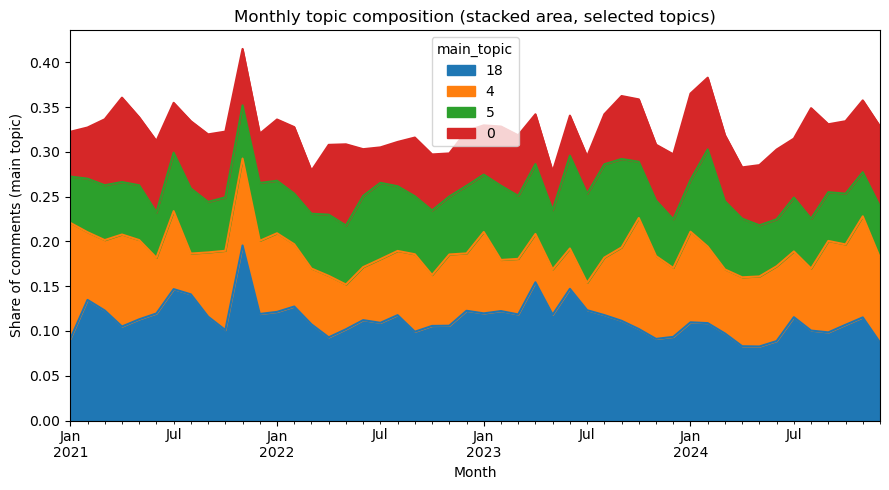

In [19]:
topic_share_wide_top = topic_share_wide[top_topics]

topic_share_wide_top.index = topic_share_wide_top.index.to_timestamp()

topic_share_wide_top.plot.area(figsize=(9, 5))
plt.xlabel("Month")
plt.ylabel("Share of comments (main topic)")
plt.title("Monthly topic composition (stacked area, selected topics)")
plt.tight_layout()
plt.show()


In [3]:
"""
build_reading_indicators_from_ss_comm.py

Use:
- ss_comm.csv  (comment-level data with sentiment + hate scores)
- ImmigrationMeanShare.csv  (monthly salience of immigration topic)

Output:
- reading_indicator_base.csv  (monthly NegShare, HateShare + salience)

Run:
    python build_reading_indicators_from_ss_comm.py
"""

import pandas as pd

# -------------------------------------------------------------------
# 1. Load comment-level data
# -------------------------------------------------------------------

comments_file = "ss_comm.csv"
df = pd.read_csv(comments_file)

# Ensure month is a proper datetime column
df["month"] = pd.to_datetime(df["month"], errors="coerce")

# Drop rows without month or immigration flag
df = df.dropna(subset=["month", "immigration_content"]).reset_index(drop=True)

# -------------------------------------------------------------------
# 2. Keep only immigration-related comments
# -------------------------------------------------------------------
# immigration_content looks like TRUE/FALSE; convert flexibly to boolean
imm_mask = df["immigration_content"].astype(str).str.upper().isin(["TRUE", "T", "1"])
imm_df = df[imm_mask].copy()

print(f"Number of immigration-related comments: {len(imm_df)}")

# -------------------------------------------------------------------
# 3. Create a binary 'is_negative' from sent_label
# -------------------------------------------------------------------
# sent_label values: "negative", "neutral", "positive"
imm_df["is_negative"] = (
    imm_df["sent_label"]
    .astype(str)
    .str.lower()
    .str.startswith("neg")
    .astype(int)
)

# -------------------------------------------------------------------
# 4. Aggregate by month within immigration comments
# -------------------------------------------------------------------
monthly_imm = (
    imm_df.groupby("month")
          .agg(
              n_imm_comments=("comment_id", "size"),   # total immigration comments
              n_neg_imm=("is_negative", "sum"),        # negative immigration comments
              n_hate_imm=("is_hate", "sum"),           # hate immigration comments
              mean_sentiment=("sent_score", "mean")    # avg sentiment among immigration comments
          )
          .reset_index()
)

# Conditional shares: P(negative | immigration), P(hate | immigration)
monthly_imm["neg_share"] = monthly_imm["n_neg_imm"] / monthly_imm["n_imm_comments"]
monthly_imm["hate_share"] = monthly_imm["n_hate_imm"] / monthly_imm["n_imm_comments"]

print("Monthly immigration-only indicators (head):")
print(monthly_imm.head())

# -------------------------------------------------------------------
# 5. Load ImmigrationMeanShare (monthly salience) and merge
# -------------------------------------------------------------------
salience_file = "ImmigrationMeanShare.csv"
sal = pd.read_csv(salience_file)

# Parse month column
sal["month"] = pd.to_datetime(sal["month"], errors="coerce")

# If your column name is different, change "ImmigrationMeanShare" here
sal = sal[["month", "ImmigrationMeanShare"]]

print("Salience data (head):")
print(sal.head())

# Merge on month (keep only months present in both tables)
merged = pd.merge(
    monthly_imm,
    sal,
    on="month",
    how="inner"
)

print("Merged monthly dataset (head):")
print(merged.head())

# -------------------------------------------------------------------
# 6. Save final monthly base file for R
# -------------------------------------------------------------------
output_file = "reading_indicator_base.csv"
merged.to_csv(output_file, index=False)

print(f"Saved monthly reading indicators to: {output_file}")


Number of immigration-related comments: 17715
Monthly immigration-only indicators (head):
       month  n_imm_comments  n_neg_imm  n_hate_imm  mean_sentiment  \
0 2021-01-01              99         72          27       -0.616019   
1 2021-02-01              79         53          17       -0.676086   
2 2021-03-01             203        142          51       -0.691451   
3 2021-04-01             107         83          32       -0.746069   
4 2021-05-01              68         42          17       -0.506972   

   neg_share  hate_share  
0   0.727273    0.272727  
1   0.670886    0.215190  
2   0.699507    0.251232  
3   0.775701    0.299065  
4   0.617647    0.250000  
Salience data (head):
       month  ImmigrationMeanShare
0 2021-01-01              0.035976
1 2021-02-01              0.039255
2 2021-03-01              0.052582
3 2021-04-01              0.065705
4 2021-05-01              0.055180
Merged monthly dataset (head):
       month  n_imm_comments  n_neg_imm  n_hate_imm  mean_